In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('FinalSongData.csv')
df2 = pd.read_csv('Top100TrackWithIDNoPlayCount.csv')
df3 = pd.read_csv('Top100Tracks.csv')

In [3]:
df1.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,57zCgMTx5dfOL6HRvdfifr,0.395,0.848,4,-7.285,0,0.0527,0.00126,0.000500,0.335,0.580,87.619,audio_features,spotify:track:57zCgMTx5dfOL6HRvdfifr,https://api.spotify.com/v1/tracks/57zCgMTx5dfO...,https://api.spotify.com/v1/audio-analysis/57zC...,243547,4
1,7p4BDGzQhqb9VfDj65RkJ4,0.599,0.846,5,-6.086,1,0.1980,0.05150,0.000012,0.748,0.875,108.207,audio_features,spotify:track:7p4BDGzQhqb9VfDj65RkJ4,https://api.spotify.com/v1/tracks/7p4BDGzQhqb9...,https://api.spotify.com/v1/audio-analysis/7p4B...,251627,4
2,5yijXzKaT2wO9ySWMTkTKy,0.327,0.851,6,-7.656,0,0.0629,0.00206,0.003700,0.722,0.508,96.377,audio_features,spotify:track:5yijXzKaT2wO9ySWMTkTKy,https://api.spotify.com/v1/tracks/5yijXzKaT2wO...,https://api.spotify.com/v1/audio-analysis/5yij...,358467,4
3,21rMnUjWZaKxfewp1RTu7f,0.376,0.853,11,-6.698,0,0.3080,0.01870,0.024900,0.300,0.301,144.403,audio_features,spotify:track:21rMnUjWZaKxfewp1RTu7f,https://api.spotify.com/v1/tracks/21rMnUjWZaKx...,https://api.spotify.com/v1/audio-analysis/21rM...,341333,4
4,4gPnDCCNHUQcbrA8netoyc,0.427,0.730,9,-6.173,0,0.0360,0.01800,0.000364,0.218,0.553,106.255,audio_features,spotify:track:4gPnDCCNHUQcbrA8netoyc,https://api.spotify.com/v1/tracks/4gPnDCCNHUQc...,https://api.spotify.com/v1/audio-analysis/4gPn...,386667,4


In [4]:
df2.head()

,artistName,trackName,trackID
0,Kansas,Don't Open Your Eyes,57zCgMTx5dfOL6HRvdfifr
1,Kansas,Stay out of Trouble,7p4BDGzQhqb9VfDj65RkJ4
2,Kansas,Icarus - Borne on Wings of Steel,5yijXzKaT2wO9ySWMTkTKy
3,Kansas,How My Soul Cries Out for You,21rMnUjWZaKxfewp1RTu7f
4,Kansas,Miracles out of Nowhere,4gPnDCCNHUQcbrA8netoyc


In [5]:
# Need to match column name "trackID" with "id" in df1

df1.rename(columns={"id": "trackID"}, inplace=True)

df1.head()

,trackID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,57zCgMTx5dfOL6HRvdfifr,0.395,0.848,4,-7.285,0,0.0527,0.00126,0.000500,0.335,0.580,87.619,audio_features,spotify:track:57zCgMTx5dfOL6HRvdfifr,https://api.spotify.com/v1/tracks/57zCgMTx5dfO...,https://api.spotify.com/v1/audio-analysis/57zC...,243547,4
1,7p4BDGzQhqb9VfDj65RkJ4,0.599,0.846,5,-6.086,1,0.1980,0.05150,0.000012,0.748,0.875,108.207,audio_features,spotify:track:7p4BDGzQhqb9VfDj65RkJ4,https://api.spotify.com/v1/tracks/7p4BDGzQhqb9...,https://api.spotify.com/v1/audio-analysis/7p4B...,251627,4
2,5yijXzKaT2wO9ySWMTkTKy,0.327,0.851,6,-7.656,0,0.0629,0.00206,0.003700,0.722,0.508,96.377,audio_features,spotify:track:5yijXzKaT2wO9ySWMTkTKy,https://api.spotify.com/v1/tracks/5yijXzKaT2wO...,https://api.spotify.com/v1/audio-analysis/5yij...,358467,4
3,21rMnUjWZaKxfewp1RTu7f,0.376,0.853,11,-6.698,0,0.3080,0.01870,0.024900,0.300,0.301,144.403,audio_features,spotify:track:21rMnUjWZaKxfewp1RTu7f,https://api.spotify.com/v1/tracks/21rMnUjWZaKx...,https://api.spotify.com/v1/audio-analysis/21rM...,341333,4
4,4gPnDCCNHUQcbrA8netoyc,0.427,0.730,9,-6.173,0,0.0360,0.01800,0.000364,0.218,0.553,106.255,audio_features,spotify:track:4gPnDCCNHUQcbrA8netoyc,https://api.spotify.com/v1/tracks/4gPnDCCNHUQc...,https://api.spotify.com/v1/audio-analysis/4gPn...,386667,4


I want to merge these together to make a final_df for this project.

I do not want to keep the "type", "uri", "track_href", or "analysis_url" in df1.

In [6]:
df1.drop(['type', 'uri', 'track_href', 'analysis_url', 'duration_ms'], axis=1, inplace=True)

In [7]:
df1.head()

,trackID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,57zCgMTx5dfOL6HRvdfifr,0.395,0.848,4,-7.285,0,0.0527,0.00126,0.000500,0.335,0.580,87.619,4
1,7p4BDGzQhqb9VfDj65RkJ4,0.599,0.846,5,-6.086,1,0.1980,0.05150,0.000012,0.748,0.875,108.207,4
2,5yijXzKaT2wO9ySWMTkTKy,0.327,0.851,6,-7.656,0,0.0629,0.00206,0.003700,0.722,0.508,96.377,4
3,21rMnUjWZaKxfewp1RTu7f,0.376,0.853,11,-6.698,0,0.3080,0.01870,0.024900,0.300,0.301,144.403,4
4,4gPnDCCNHUQcbrA8netoyc,0.427,0.730,9,-6.173,0,0.0360,0.01800,0.000364,0.218,0.553,106.255,4


In [8]:
new_df = df1.merge(df2, on='trackID')

new_df.head()

,trackID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artistName,trackName
0,57zCgMTx5dfOL6HRvdfifr,0.395,0.848,4,-7.285,0,0.0527,0.00126,0.000500,0.335,0.580,87.619,4,Kansas,Don't Open Your Eyes
1,7p4BDGzQhqb9VfDj65RkJ4,0.599,0.846,5,-6.086,1,0.1980,0.05150,0.000012,0.748,0.875,108.207,4,Kansas,Stay out of Trouble
2,5yijXzKaT2wO9ySWMTkTKy,0.327,0.851,6,-7.656,0,0.0629,0.00206,0.003700,0.722,0.508,96.377,4,Kansas,Icarus - Borne on Wings of Steel
3,21rMnUjWZaKxfewp1RTu7f,0.376,0.853,11,-6.698,0,0.3080,0.01870,0.024900,0.300,0.301,144.403,4,Kansas,How My Soul Cries Out for You
4,4gPnDCCNHUQcbrA8netoyc,0.427,0.730,9,-6.173,0,0.0360,0.01800,0.000364,0.218,0.553,106.255,4,Kansas,Miracles out of Nowhere


Now join new_df with df3 on "artistName" and "trackName"

In [9]:
final_df = new_df.merge(df3, on=['artistName', 'trackName'])

final_df.head()

,trackID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artistName,trackName,PlayCount
0,57zCgMTx5dfOL6HRvdfifr,0.395,0.848,4,-7.285,0,0.0527,0.00126,0.000500,0.335,0.580,87.619,4,Kansas,Don't Open Your Eyes,101
1,7p4BDGzQhqb9VfDj65RkJ4,0.599,0.846,5,-6.086,1,0.1980,0.05150,0.000012,0.748,0.875,108.207,4,Kansas,Stay out of Trouble,28
2,5yijXzKaT2wO9ySWMTkTKy,0.327,0.851,6,-7.656,0,0.0629,0.00206,0.003700,0.722,0.508,96.377,4,Kansas,Icarus - Borne on Wings of Steel,27
3,21rMnUjWZaKxfewp1RTu7f,0.376,0.853,11,-6.698,0,0.3080,0.01870,0.024900,0.300,0.301,144.403,4,Kansas,How My Soul Cries Out for You,24
4,4gPnDCCNHUQcbrA8netoyc,0.427,0.730,9,-6.173,0,0.0360,0.01800,0.000364,0.218,0.553,106.255,4,Kansas,Miracles out of Nowhere,22


In [10]:
# trackID col no longer needed

final_df.drop('trackID', axis=1, inplace=True)

In [31]:
# Save as csv

final_df.to_csv('FinalSongAnalysisMerged.csv', index=False)

In [12]:
final_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artistName,trackName,PlayCount
0,0.395,0.848,4,-7.285,0,0.0527,0.00126,0.000500,0.335,0.580,87.619,4,Kansas,Don't Open Your Eyes,101
1,0.599,0.846,5,-6.086,1,0.1980,0.05150,0.000012,0.748,0.875,108.207,4,Kansas,Stay out of Trouble,28
2,0.327,0.851,6,-7.656,0,0.0629,0.00206,0.003700,0.722,0.508,96.377,4,Kansas,Icarus - Borne on Wings of Steel,27
3,0.376,0.853,11,-6.698,0,0.3080,0.01870,0.024900,0.300,0.301,144.403,4,Kansas,How My Soul Cries Out for You,24
4,0.427,0.730,9,-6.173,0,0.0360,0.01800,0.000364,0.218,0.553,106.255,4,Kansas,Miracles out of Nowhere,22


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      294 non-null    float64
 1   energy            294 non-null    float64
 2   key               294 non-null    int64  
 3   loudness          294 non-null    float64
 4   mode              294 non-null    int64  
 5   speechiness       294 non-null    float64
 6   acousticness      294 non-null    float64
 7   instrumentalness  294 non-null    float64
 8   liveness          294 non-null    float64
 9   valence           294 non-null    float64
 10  tempo             294 non-null    float64
 11  time_signature    294 non-null    int64  
 12  artistName        294 non-null    object 
 13  trackName         294 non-null    object 
 14  PlayCount         294 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 44.9+ KB


In [13]:
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,294.0,0.457500,0.116566,0.133000,0.384250,0.473500,0.52900,0.873
energy,294.0,0.885080,0.130394,0.080600,0.853000,0.934000,0.96950,0.997
key,294.0,5.180272,3.392144,0.000000,2.000000,5.000000,8.00000,11.000
loudness,294.0,-5.313310,2.524278,-15.167000,-6.736500,-4.696000,-3.44425,-1.470
mode,294.0,0.653061,0.476808,0.000000,0.000000,1.000000,1.00000,1.000
speechiness,294.0,0.089598,0.078698,0.025000,0.045350,0.067300,0.10975,0.933
acousticness,294.0,0.032273,0.095679,0.000004,0.000226,0.001460,0.01057,0.777
instrumentalness,294.0,0.028178,0.112777,0.000000,0.000000,0.000033,0.00147,0.887
liveness,294.0,0.231093,0.174119,0.027100,0.101250,0.173000,0.33100,0.969
valence,294.0,0.498494,0.201044,0.043300,0.346750,0.495000,0.62500,0.967


Danceability: From 0 to 1. How "easy" it is to dance to a song.

Energy: 0 to 1. Represents a perceptual measure of intensity and activity. Higher ---> more energy

Key: Major key of a track {0: C, 1: C#, 2:D, ..., 11: B}

Loudness: Overall loudness of a track in dB. Typically between -60 and 0 dB.

Mode: Major (1) or Minor (0)

Speechiness: 0 to 1. Detects the amount of speech compared to the amount of singing. Higher ---> more speech.

Acousticness: 0 to 1. Measures how acoustic vs. electric. Higher is more acoustic.

Instrumentalness: 0 to 1. The higher, the more likely it is instrumental (no vocals)

Liveness: 0 to 1. Higher means the track is more likely to be recorded live.

Valence: 0 to 1. Positiveness conveyed by a song. The higher the score, the more positive (happy, etc) it is.

Tempo: The quickness of a song. The higher, the more fast-paced.

Time Signature: How the music is being counted. Almost always 4, so this may be unnecessary data (doesn't provide anything).

Play Count: The amount of times played over the past year.

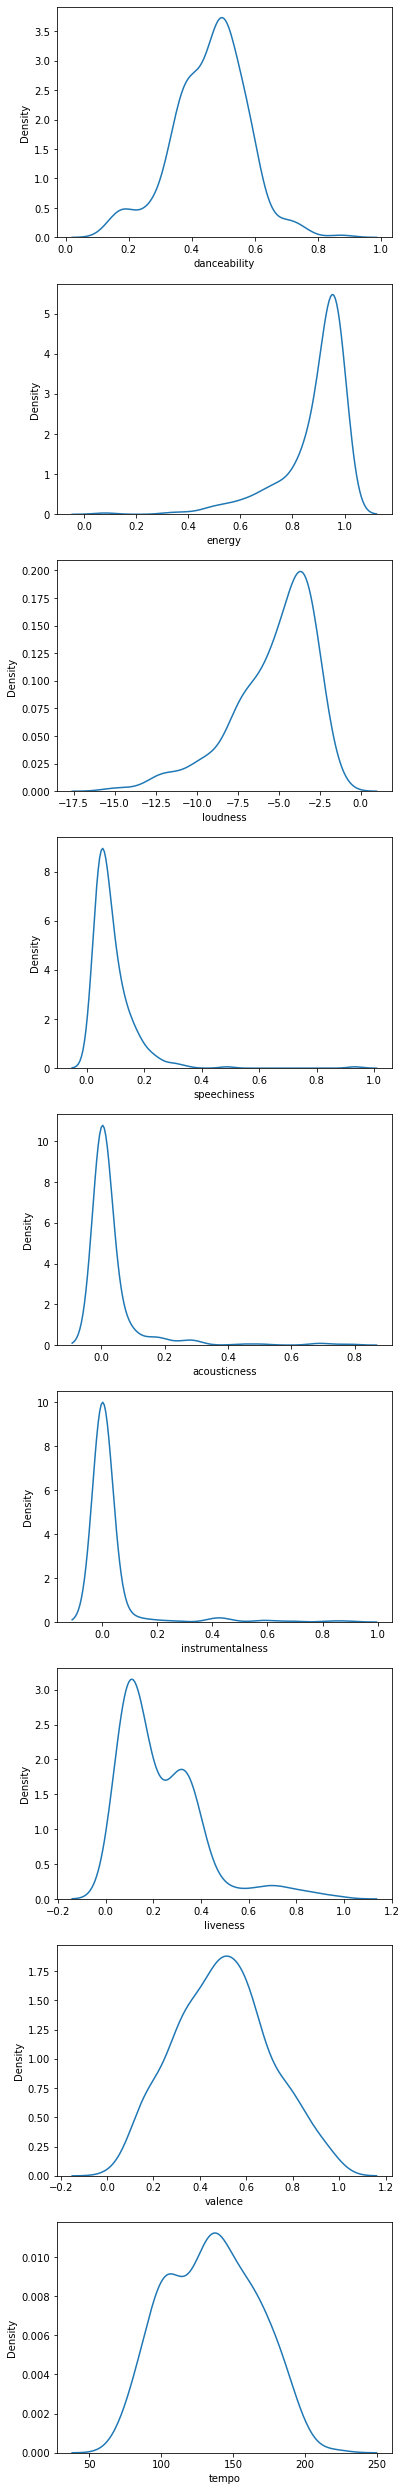

In [14]:
hist_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo']


N = len(hist_features)

fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(6, N*5))

for i in range(N):
    sns.kdeplot(data=final_df, x=hist_features[i], ax=ax[i])
    
    
    

As the above shows, my top songs are, for the most part, have tightly distributed features. 

I listen to songs that have very low speechiness, acousticness, and instrumentalness, meaning my top songs do not have much talking, highly electric, and plenty of singing.

The valence is rather normally distributed with a mean of 0.5.

The tempo of my songs is also somewhat normally distributed with a mean of around 140. This is rather high.

The tempo goes along with the loudness/energy being rather high, as faster paced songs would tend to be louder and have more energy.

Danceability is averaged around 0.5, but heavier weight on the tail close to 0 than 1, meaning my songs danceability is below the average.

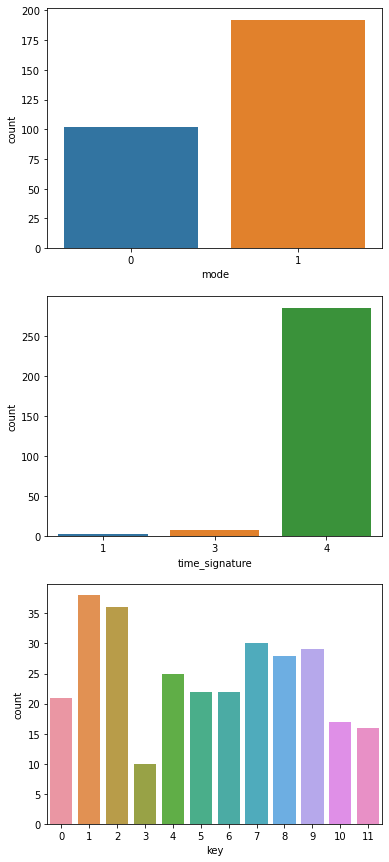

In [15]:
count_features = ['mode', 'time_signature', 'key']

M = len(count_features)

fig, ax = plt.subplots(nrows=M, ncols=1, figsize=(6, 5*M))

for i in range(M):
    sns.countplot(data=final_df, x=count_features[i], ax=ax[i])

The majority of my most played songs are played in a major instead of minor key. Time signature is almost always 4, which is pretty standard, especially for rock music which is mostly what I listen to.

There is no pattern as far as the major key of a song. While not perfectly evenly distributed, only a couple seem high and one seems low, the other 9 seem in the same region.

I am interested to see if any features are highly correlated.

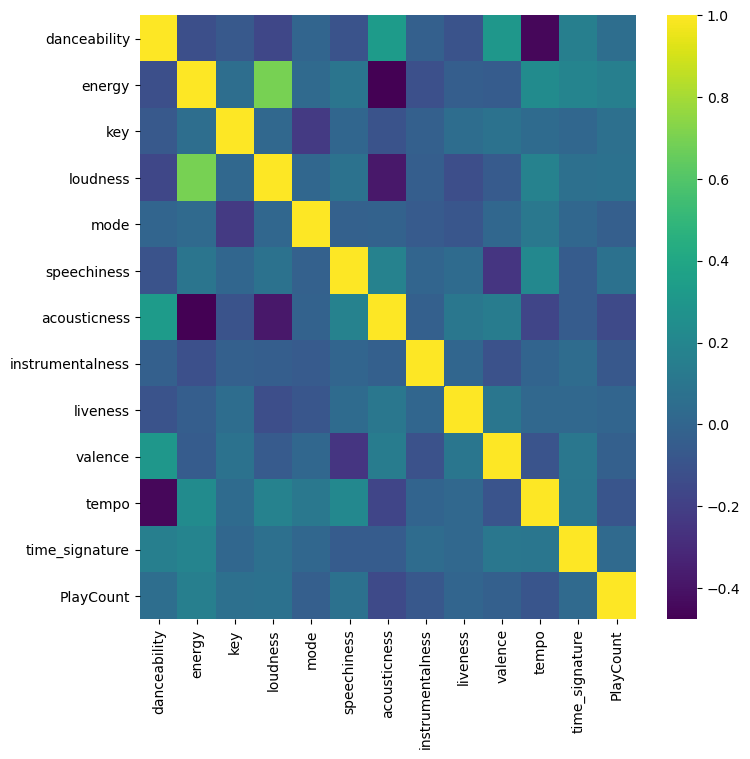

In [22]:
plt.figure(figsize=(8,8), dpi=100)

sns.heatmap(data=final_df.corr(), cmap='viridis');

It looks as though loudness are energy are the two most positively correlated features.

Acousticness and energy are highly negatively correlated, along with tempo and danceability.

All other feature combinations seem relatively uncorrelated.